<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación diagnóstica de mamografías </h2>
</center>

<h3> Práctico I -  Análisis y Visualización de Datos<h3>
    <h4>Integrantes:Mario Agustín Sgró, Lucía Benítez y Germán Bertea<h4>

Inicialmente, como en toda exploración de datos tenemos muy poca información *a priori* sobre el significado de los datos y tenemos que empezar por comprenderlos.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import pandas_profiling as pp

#%matplotlib inline
plt.rcParams['figure.figsize'] = (200, 200)
#plt.style.use('ggplot')
#!pip install pandas-profiling

In [27]:
pd.options.display.max_columns = 200
#pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000

Comenzamos la lectura del dataset:

In [28]:
dataframe = pd.read_csv('Datos_Mamografias.csv',sep=',')
dataframe.head(3)

,Imagen,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_7,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_15,Dcm_16,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
0,Imagen_0.npy,47.0,CC,R,29.0,130.0,155.0,1115.0,RHODIUM,0.05,0.3,TUNGSTEN,54.0,58.5,700.0,621.0,1.073,-8.4,AUTOMATIC,AutoFilter,321.0,6.53,0.0172,0.531,2047.0,4096.0,NO,1906717.0,1204.431581,1108.0,651.401605,0.631631,-0.158630,771.0,582.461892,617.414299,571.626601,1.254898,0.340503,0.478727,26.263890,50.872416,30.246896,39.025868,57.284054,56.462588,0.769471,0.176043,0.012500,0.000003,29632.094980,0.965015,423492.945587,0.010546,2407.880580,1.664340e+06,12.237075,18.933134,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.620735,0.957571,423372.418259,0.009612,2407.639224,1.657563e+06,12.235604,19.052746,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.183717,0.964600,424267.419997,0.010677,2408.826967,1.667031e+06,12.238215,18.941108,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.380011,0.958552,423500.102813,0.009655,2407.789176,1.658894e+06,12.236029,19.042339,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.278823,41.339488,-0.004142,-0.801469,1.739567,0.322655,571.489193,158.341050,-1.165407,-0.038599,1.770398,0.299554,1114.887169,161.670179,-1.183844,0.085194,1.720933,0.239346,1706.529132,189.689059,-1.103810,0.225300,1.563104,0.110528,2449.700145,306.298340,1.157895,1.152985,1.748927,0.349874,1941.302019,416.666606,0.676891,0.995952,1.852387,0.649428,1560.111365,524.693103,0.226560,0.823606,1.911039,0.972917,1231.635371,639.340074,-0.129694,0.658866,1.347935,0.041248,303.067490,57.467044,2.316524,0.466817,1.704150,0.247506,768.162586,262.713541,-0.122940,-0.589775,1.798841,0.421929,1148.854002,337.062943,-0.678163,0.150996,1.751035,0.341997,1627.667484,380.140389,-0.268313,0.277035,1.569299,0.124358,2030.372695,254.066279,8.731229,-1.076601,1.679952,0.224516,1405.837251,235.788707,5.110653,-0.352031,1.663799,0.207258,867.106498,193.95269,14.221943,0.852135,1.362630,0.046754,334.152548,266.144497,42.727260,5.647393,c
1,Imagen_1.npy,47.0,MLO,R,28.0,100.0,115.0,1102.0,RHODIUM,0.05,0.3,TUNGSTEN,47.0,86.0,700.0,628.0,1.073,-44.9,AUTOMATIC,AutoFilter,301.0,4.33,0.0126,0.519,2047.0,4096.0,NO,1993379.0,1095.674679,966.0,617.925388,0.822188,0.159056,771.0,577.999696,630.151155,590.633212,1.092861,0.499981,0.421337,26.204560,50.051997,35.612135,48.703866,58.672811,50.210659,0.771289,0.165031,0.053571,0.000003,40089.941086,0.947479,381659.322432,0.008924,2191.233824,1.486547e+06,12.113787,18.843584,7.420714e-07,8.663215,-0.180066,0.987916,0.000003,48232.540197,0.936822,381719.250143,0.008153,2191.

In [29]:
print(dataframe.shape)
#print(dataframe.info())

(6613, 198)


Nombres de las variables/features/características:


In [30]:
dataframe.columns.values

array(['Imagen', 'Age', 'View', 'Laterality', 'Dcm_1', 'Dcm_2', 'Dcm_3',
       'Dcm_4', 'Dcm_5', 'Dcm_6', 'Dcm_7', 'Dcm_8', 'Dcm_9', 'Dcm_10',
       'Dcm_11', 'Dcm_12', 'Dcm_13', 'Dcm_14', 'Dcm_15', 'Dcm_16',
       'Dcm_17', 'Dcm_18', 'Dcm_19', 'Dcm_20', 'Dcm_21', 'Dcm_22',
       'Dcm_23', 'Area', 'Promedio', 'Media', 'Desvio', 'Asimetria',
       'Kurtosis', 'Moda', 'Desvio_L1', 'Desvio_L2', 'Desvio_L3',
       'Asimetria_L1', 'Asimetria_L2', 'Asimetria_L3', 'promGradiente',
       'Relacion', 'Relacion_L1', 'Relacion_L2', 'Relacion_L3',
       'Relacion_L4', 'EP', 'EPBinaria', 'RelEntropia', 'Haralick_1',
       'Haralick_2', 'Haralick_3', 'Haralick_4', 'Haralick_5',
       'Haralick_6', 'Haralick_7', 'Haralick_8', 'Haralick_9',
       'Haralick_10', 'Haralick_11', 'Haralick_12', 'Haralick_13',
       'Haralick_14', 'Haralick_15', 'Haralick_16', 'Haralick_17',
       'Haralick_18', 'Haralick_19', 'Haralick_20', 'Haralick_21',
       'Haralick_22', 'Haralick_23', 'Haralick_24', 'H

Tipo de las variables/features/características:

In [31]:
dataframe.dtypes

Imagen            object
Age              float64
View              object
Laterality        object
Dcm_1            float64
Dcm_2            float64
Dcm_3            float64
Dcm_4            float64
Dcm_5             object
Dcm_6            float64
Dcm_7            float64
Dcm_8             object
Dcm_9            float64
Dcm_10           float64
Dcm_11           float64
Dcm_12           float64
Dcm_13           float64
Dcm_14           float64
Dcm_15            object
Dcm_16            object
Dcm_17           float64
Dcm_18            object
Dcm_19            object
Dcm_20           float64
Dcm_21           float64
Dcm_22           float64
Dcm_23            object
Area             float64
Promedio         float64
Media            float64
Desvio           float64
Asimetria        float64
Kurtosis         float64
Moda             float64
Desvio_L1        float64
Desvio_L2        float64
Desvio_L3        float64
Asimetria_L1     float64
Asimetria_L2     float64
Asimetria_L3     float64


Debido a que en las columnas 'Dcm_18' y 'Dcm_19' se observaron datos faltantes denotados como 'None',  se ha cambiado por 'np.nan' para que se puedan leer como números los datos de tales columnas:

In [32]:
dataframe['Dcm_18'].replace('None',np.nan,inplace=True)
dataframe['Dcm_19'].replace('None',np.nan,inplace=True)

dataframe.Dcm_18 = dataframe.Dcm_18.astype(float)
dataframe.Dcm_19 = dataframe.Dcm_19.astype(float)

Dentro de la base de datos hay filas que contienen todos sus campos sin registro, y es por ello que las descartamos de los datos.

In [33]:
data = dataframe.dropna(axis=0)  
#contar cuántos nan y restar del total  ver si son los datos que faltan

# Análisis 

**1-¿Cuáles variables considera a priori las más importantes de analizar en el contexto dado?.**


In [34]:
var_float = data.select_dtypes(include=[np.float])
var_no_float = data.select_dtypes(exclude=[np.number])
var_float.shape,var_no_float.shape

print('Número de filas y columnas' + str('\n')+
      '   variables numéricas     '+ str(var_float.shape) + str('\n')
      + '   variables NO numéricas  ' + str(var_no_float.shape))

Número de filas y columnas
   variables numéricas     (6394, 189)
   variables NO numéricas  (6394, 9)


La base de datos contiene 9 variables categóricas y 189 variables numéricas, con 6394 filas de datos

### Analizando las variables No-Numéricas

In [35]:
Features = [x for x in data.columns if data[x].dtype != 'float64']
print(Features)

['Imagen', 'View', 'Laterality', 'Dcm_5', 'Dcm_8', 'Dcm_15', 'Dcm_16', 'Dcm_23', 'ACR']


In [36]:
for feature in Features[1:]:
    #print(feature,np.unique(data[feature]),data[feature].dtype)
    print(feature,np.unique(data[feature]))

View ['CC' 'MLO' 'MLOID']
Laterality ['L' 'R']
Dcm_5 ['MOLYBDENUM' 'RHODIUM' 'SILVER']
Dcm_8 ['MOLYBDENUM' 'TUNGSTEN']
Dcm_15 ['AUTOMATIC' 'AUTO_FILTER' 'MANUAL']
Dcm_16 ['AutoFilter' 'LORAD AUTO AEC' 'MANUAL' 'Manual']
Dcm_23 ['NO' 'YES']
ACR ['a' 'b' 'c' 'd']


In [37]:
yes = data["Dcm_23"] == "YES"
no  = data["Dcm_23"] == "NO"
print("Mamografias con implantes: ",yes.sum())
print("Mamografias sin implantes: ",no.sum())

Mamografias con implantes:  683
Mamografias sin implantes:  5711


Entonces, para las variables:


* *'View'* se han tenido en cuenta la vista con la cuál se toman las mamografías, siendo respectivamente:
    *  CC:Vista craneo caudal de la imagen
    *  MLO: Vista oblicua mediolateral. 
    *  IDMLO: Vista oblicua mediolateral en pacientes con prótesis
    (porqué no hay CC de las de prótesis?)
    
    

* *'Laterality* se registró la lateralidad de la mama en:

    * 'L' : izquieda
    * 'R' : Derecha
    
    

* *'Dcm_5'* (FilterMaterial), se distinguió en el material del filtro: 
     * 'SILVER' :Plata 
     * 'MOLYBDENUM' : Molibdeno 
     * 'RHODIUM' : Rodio



* *'Dcm_8'* (AnodeTargetMaterial), el material del blanco del ánodo puede estar construido de: 
    * 'MOLYBDENUM':  Molibdeno
    * 'TUNGSTEN' : Tungsteno 



* *'Dcm_15'* (ExposureControlMode), modo de control de la exposición. 
    Existen tres posibles configuraciones: 
    * 'AUTOMATIC': Automático. 
    * 'AUTO_FILTER': Autofiltrado. 
    * 'MANUAL': Manual.



* *'Dcm_16'* (ExposureControlModeDescrip), descripción del modo de control de la exposición. 
    Existen tres posibles configuraciones: 
    * 'AutoFilter': Autofiltrado. 
    * 'MANUAL': Manual.
    * 'LORAD AUTO AEC' 
    * 'MANUAL' 
    * 'Manual' 
    


    Estas dos últimas, se debería cambiar ambas a 'Manual' ?. LORAD AUTO AEC será 'Automático'? 

* *'Dcm_23'* (BreastImplantPresent): presencia de implante mamario. Puede tomar dos valores:
    * 'NO' : Sí
    * 'YES': No


* *'ACR:'* clasificación BI-RADS del Colegio Americano de Radiología. Las mamas se clasifican en:
    * 'a' : mamas compuestas por tejido adiposo casi en su totalidad. La mamografía es muy sensible en este contexto, siempre que se incluya en el campo de la imagen el sector que contiene la anormalidad.
    * 'b' : se observan sectores dispersos de densidad fibroglandular.
    * 'c' : mamas que presentan densidad heterogénea. En estas resulta de utilidad describir la ubicación del tejido más denso pues puede ocultar algunos nódulos pequeños o pequeñas lesiones no calcificadas.
    * 'd' : mamas muy densas. Su sensibilidad mamográfica es la más baja.
     



# Analizando variables Numéricas

Exploramos los valores de algunas medidas estadísticas tales como la media, su desviación estándar y sus valores máximos y mínimos:

In [38]:
data.describe().loc[['mean','std','min','max']]

,Age,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_6,Dcm_7,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48
mean,54.585862,29.694870,116.219112,127.289334,1011.972161,0.045117,3.000000e-01,59.160463,80.215997,690.234595,621.253519,1.055178,0.071473,387.096028,7.806425,0.017129,0.503650,2047.0,4096.0,2.724326e+06,1165.577283,1032.618940,591.243669,1.039797,1.254902,744.911480,517.357195,554.916389,534.473676,1.379845,0.886440,0.659711,21.797247,31.148492,28.481994,24.344634,31.033551,35.203845,0.768849,0.102031,0.345249,0.000005,25403.176609,0.957577,3.616466e+05,0.011742,2330.787095,1.421183e+06,11.943099,18.400899,9.938576e-07,8.278615,-0.198162,0.986634,0.000005,30332.206969,0.949600,3.616035e+05,0.010654,2330.726183,1.416082e+06,11.940811,18.514679,8.993155e-07,8.409954,-0.187007,0.983531,0.000005,25027.167795,0.958289,3.618562e+05,0.012018,2331.055790,1.422398e+06,11.943990,18.388643,1.006417e-06,8.266424,-0.199426,0.987015,0.000005,30372.259887,0.949524,3.615988e+05,0.010648,2330.725356,1.416023e+06,11.940790,18.515484,8.987152e-07,8.410952,-0.186927,0.983496,1.164743,1.465043e-02,268.644893,45.454346,0.886463,-1.056771,1.778252,0.384807,652.492447,139.995389,-0.780228,-0.230463,1.776908,0.312396,1130.486207,151.026552,-1.110652,0.194673,1.687910,0.199039,1712.194363,192.132641,-0.983962,0.325408,1.508606,0.087411,2511.080039,331.347690,1.705825,1.194508,1.717961,0.286635,1949.275987,429.204793,1.810788,1.187937,1.845249,0.599492,1524.106463,511.235346,1.638006,1.147782,1.911890,0.985093,1179.671335,585.356248,1.272676,1.059751,1.232654,0.022909,354.795188,74.480728,10.210502,0.216623,1.723954,0.283929,847.138492,217.423128,2.170905,-0.780388,1.800696,0.448911,1124.071052,312.793123,-0.120969,0.259914,1.716914,0.289231,1604.071182,372.124062,0.599545,0.307169,1.501841,0.089608,2058.665149,279.780310,14.208061,-1.573315,1.653420,0.207807,1405.168641,242.709070,9.983563,-0.419277,1.699668,0.263165,902.408020,199.547969,22.629632,1.051912,1.271789,0.029746,438.911301,424.733812,30.943661,4.054932
std,10.766752,1.752908,25.903725,54.561937,245.386301,0.008592,3.114419e-14,14.171192,26.650566,17.184273,16.532399,0.031361,32.669412,133.909239,3.829382,0.006780,0.078177,0.0,0.0,1.265073e+06,125.950909,162.845007,111.356764,0.395646,1.686301,283.524456,141.305175,138.502702,145.507885,0.553056,0.457993,0.452513,4.180652,12.835234,12.553332,13.602493,15.556086,19.369424,0.003586,0.034928,0.185098,0.000067,9416.207780,0.026946,1.344156e+05,0.003775,251.845970,5.405945e+05,0.250387,0.345419,3.394809e-07,0.318215,0.044297,0.012833,0.000067,10741.804079,0.030956,1.344233e+05,0.003299,251.841069,5.408235e

In [39]:
All_features = [x for x in data.columns if data[x].dtypes == 'float64']
Dicom_features = [x for x in data.columns if ('Dcm_' in x and data[x].dtypes == 'float64')]
Haralick_features = [x for x in data.columns if ('Haralick_' in x and data[x].dtypes == 'float64')]
DFb_features = [x for x in data.columns if ('DFb' in x and data[x].dtypes == 'float64')]
DF_features = [x for x in data.columns if ( not(x in DFb_features) and 'DF' in x and data[x].dtypes == 'float64')]
Others_features = [x for x in data.columns if ((data[x].dtypes == 'float64') and (not(x in Dicom_features) and not(x in DFb_features) and not(x in Haralick_features) and  not(x in DF_features)))]

In [40]:
print(len(All_features))

189


In [41]:
Others_features

['Age',
 'Area',
 'Promedio',
 'Media',
 'Desvio',
 'Asimetria',
 'Kurtosis',
 'Moda',
 'Desvio_L1',
 'Desvio_L2',
 'Desvio_L3',
 'Asimetria_L1',
 'Asimetria_L2',
 'Asimetria_L3',
 'promGradiente',
 'Relacion',
 'Relacion_L1',
 'Relacion_L2',
 'Relacion_L3',
 'Relacion_L4',
 'EP',
 'EPBinaria',
 'RelEntropia']

Se propone analizar la distribución de estos conjuntos de variables según la clasificación ACR 


In [42]:
#definimos algunos filtros
a_cm = data["ACR"] == "a"
b_cm = data["ACR"] == "b"
c_cm = data["ACR"] == "c"
d_cm = data["ACR"] == "d"

print('cantidad de imágenes de la base según la clase (acr)' + str('\n')+
      ' tipo a     '+ str(a_cm.sum()) + str('\n') +
      ' tipo b     '+ str(b_cm.sum()) + str('\n') +
      ' tipo c     '+ str(c_cm.sum()) + str('\n') +
      ' tipo d     '+ str(d_cm.sum()) ) 
      


cantidad de imágenes de la base según la clase (acr)
 tipo a     473
 tipo b     2701
 tipo c     2797
 tipo d     423


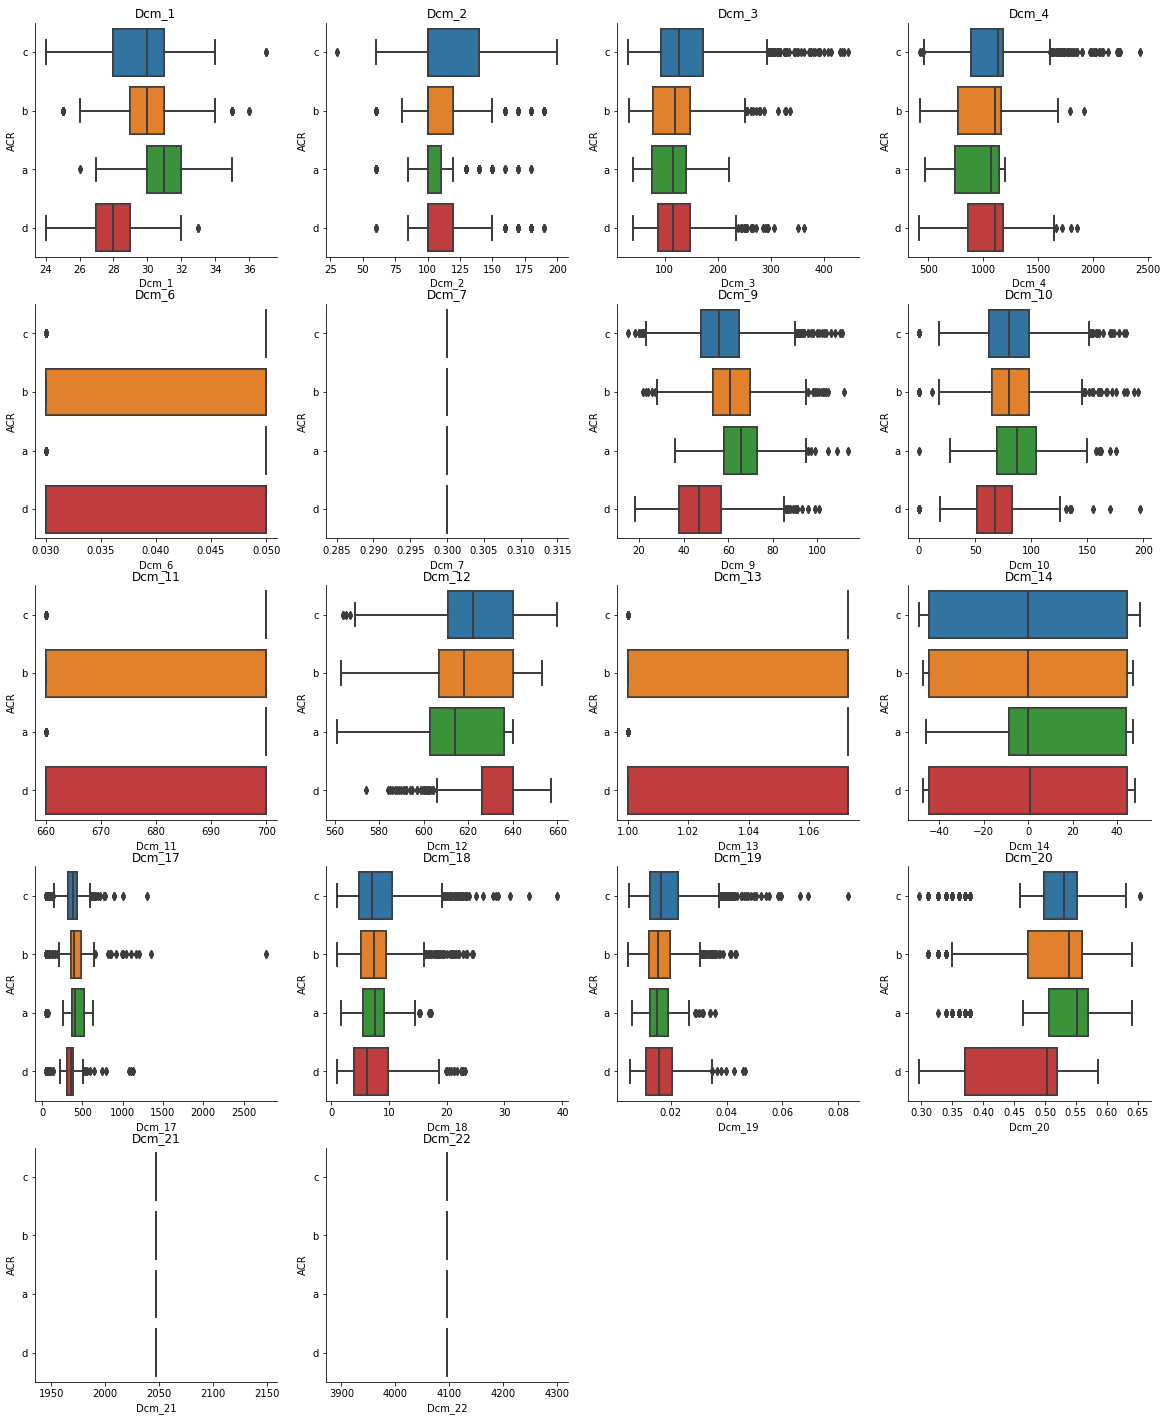

In [18]:
ntot = len(Dicom_features)
ny = 4
nx = int(ntot/ny) + 1

acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Dicom_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(acr_tp,Names):
        sns.boxplot(x=feature,data=data,y="ACR",ax=ax)
    ax.set_title(feature)
       
for ax in axes.flat[ntot:]:
    ax.axis("off")
sns.despine()

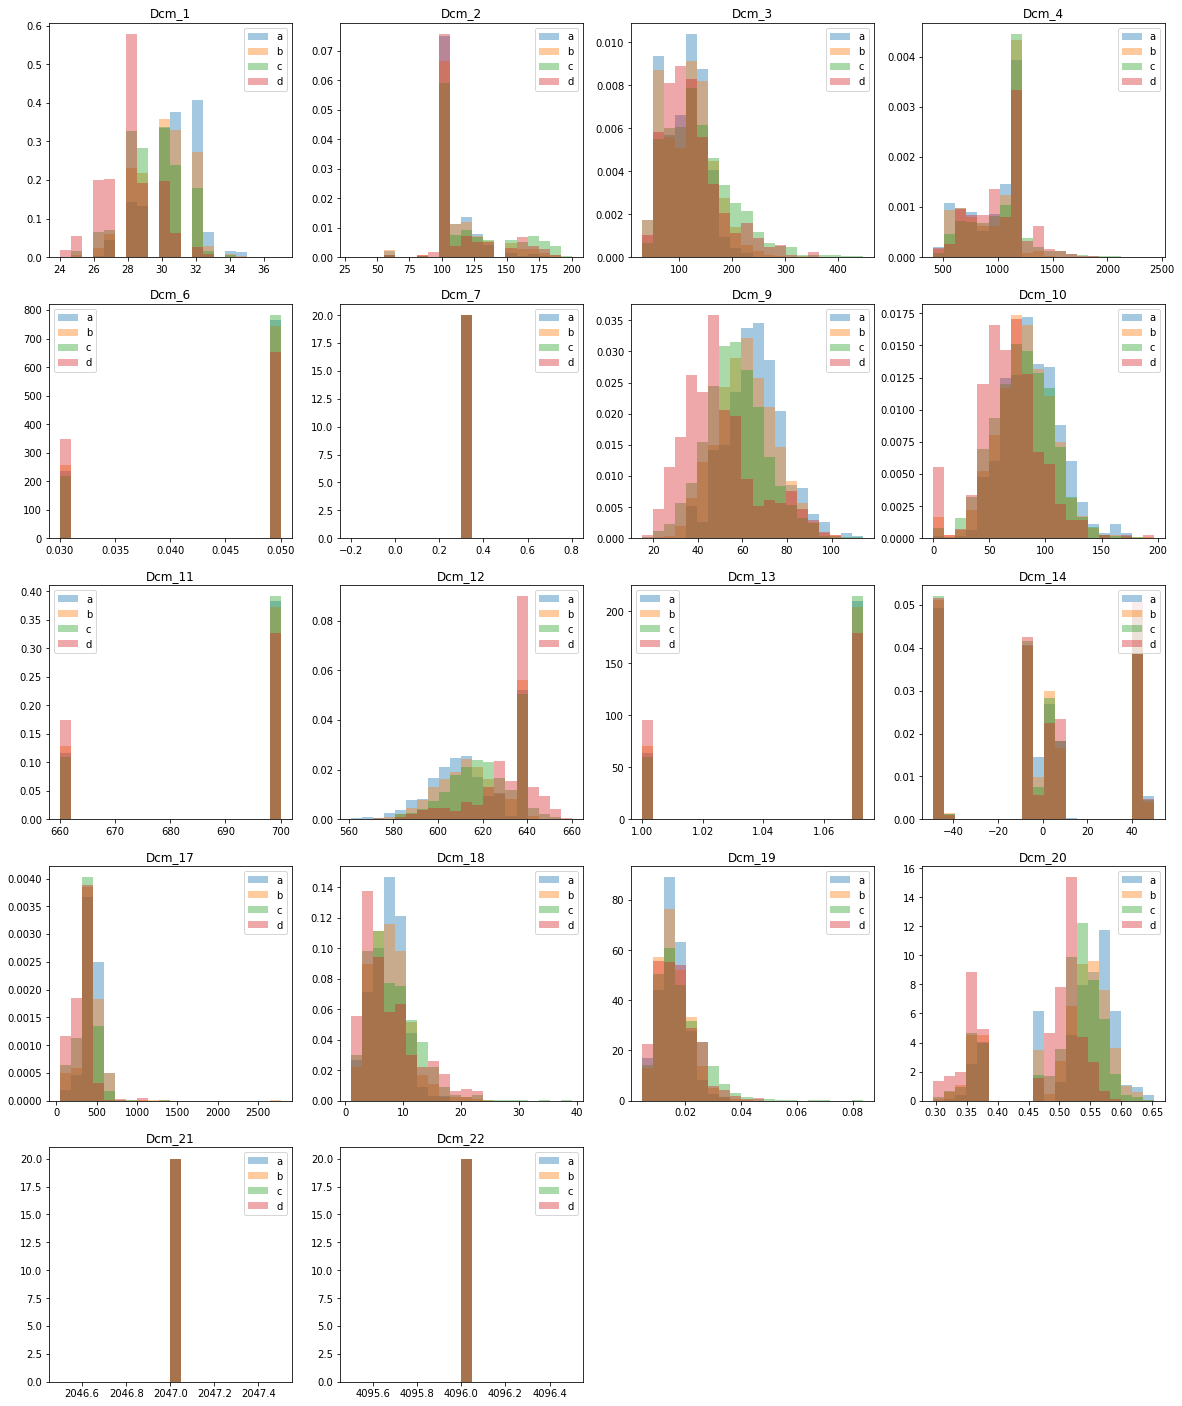

In [19]:
ntot = len(Dicom_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Dicom_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

En una primera vista de las columnas correspondientes a las características
DICOM (aquí indicadas como 'Dicom_features'), no aportarían a la clasificación ACR 
las columnas: DCM_6,DCM_7, DCM_11, DCM_13, DCM_21 y DCM_22, debido a que toman un sólo valor para los 4 tipos de mamas.


Siendo la descripción de las mismas:     

    * Dcm_6  --> FilterThickness. 
        Espesor del filtro
    *  Dcm_7  --> FocalSpots.
        Punto focal: Tamaño nominal del punto focal en mm utilizado para adquirir la imagen.
    *  Dcm_11  --> DistanceSourceDetector
        Distancia de la fuente al detector: Distancia en mm desde la fuente hasta el centro del detector
    *  Dcm_13  --> EstimatedMagnification : Estimación de la magnificación
    *  Dcm_21  --> WindowCenter
    *  Dcm_22  --> WindowWidth  

In [43]:
# Las eliminamos del análisis de la base de datos:
Dicom_features.remove('Dcm_6')
Dicom_features.remove('Dcm_7')
Dicom_features.remove('Dcm_11')
Dicom_features.remove('Dcm_13')
Dicom_features.remove('Dcm_21')
Dicom_features.remove('Dcm_22')
#Se eliminan 6 columnas de DICOM

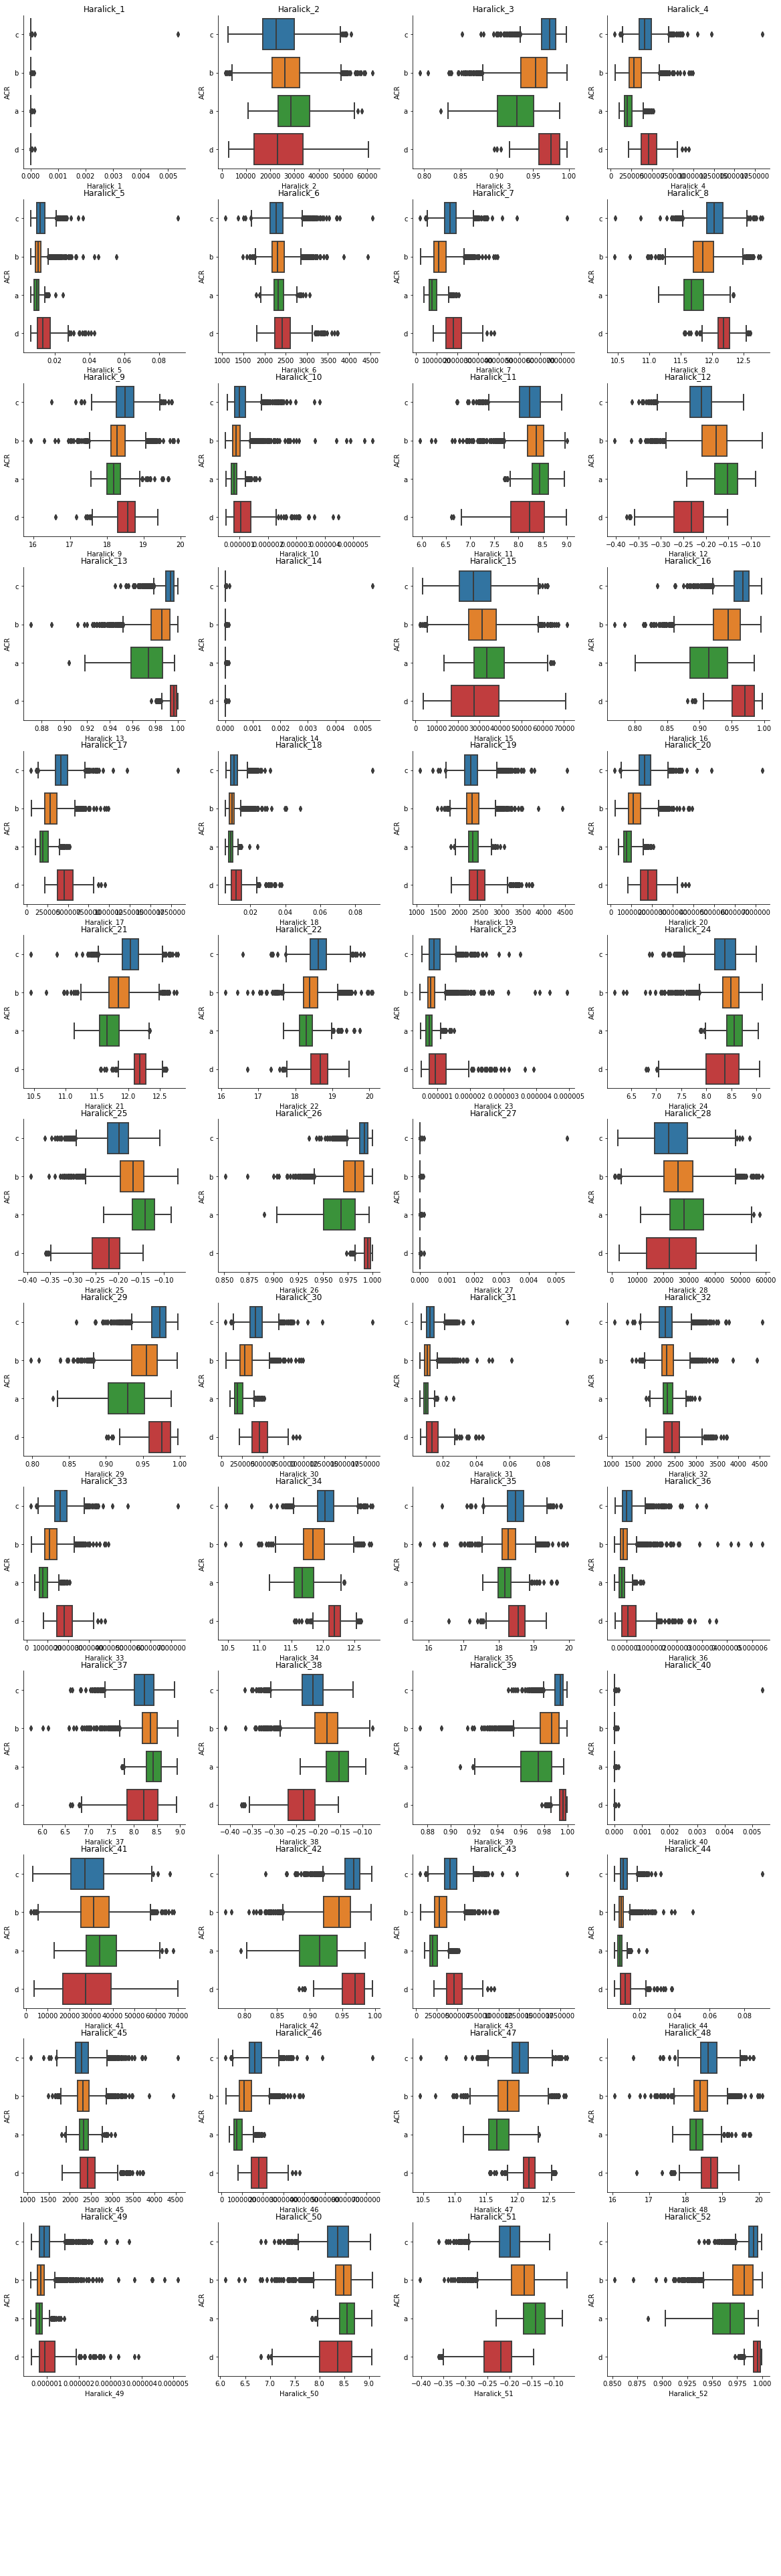

In [21]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(acr_tp,Names):
        sns.boxplot(x=feature,data=data,y="ACR",ax=ax)
    ax.set_title(feature)
       
for ax in axes.flat[ntot:]:
    ax.axis("off")
sns.despine()

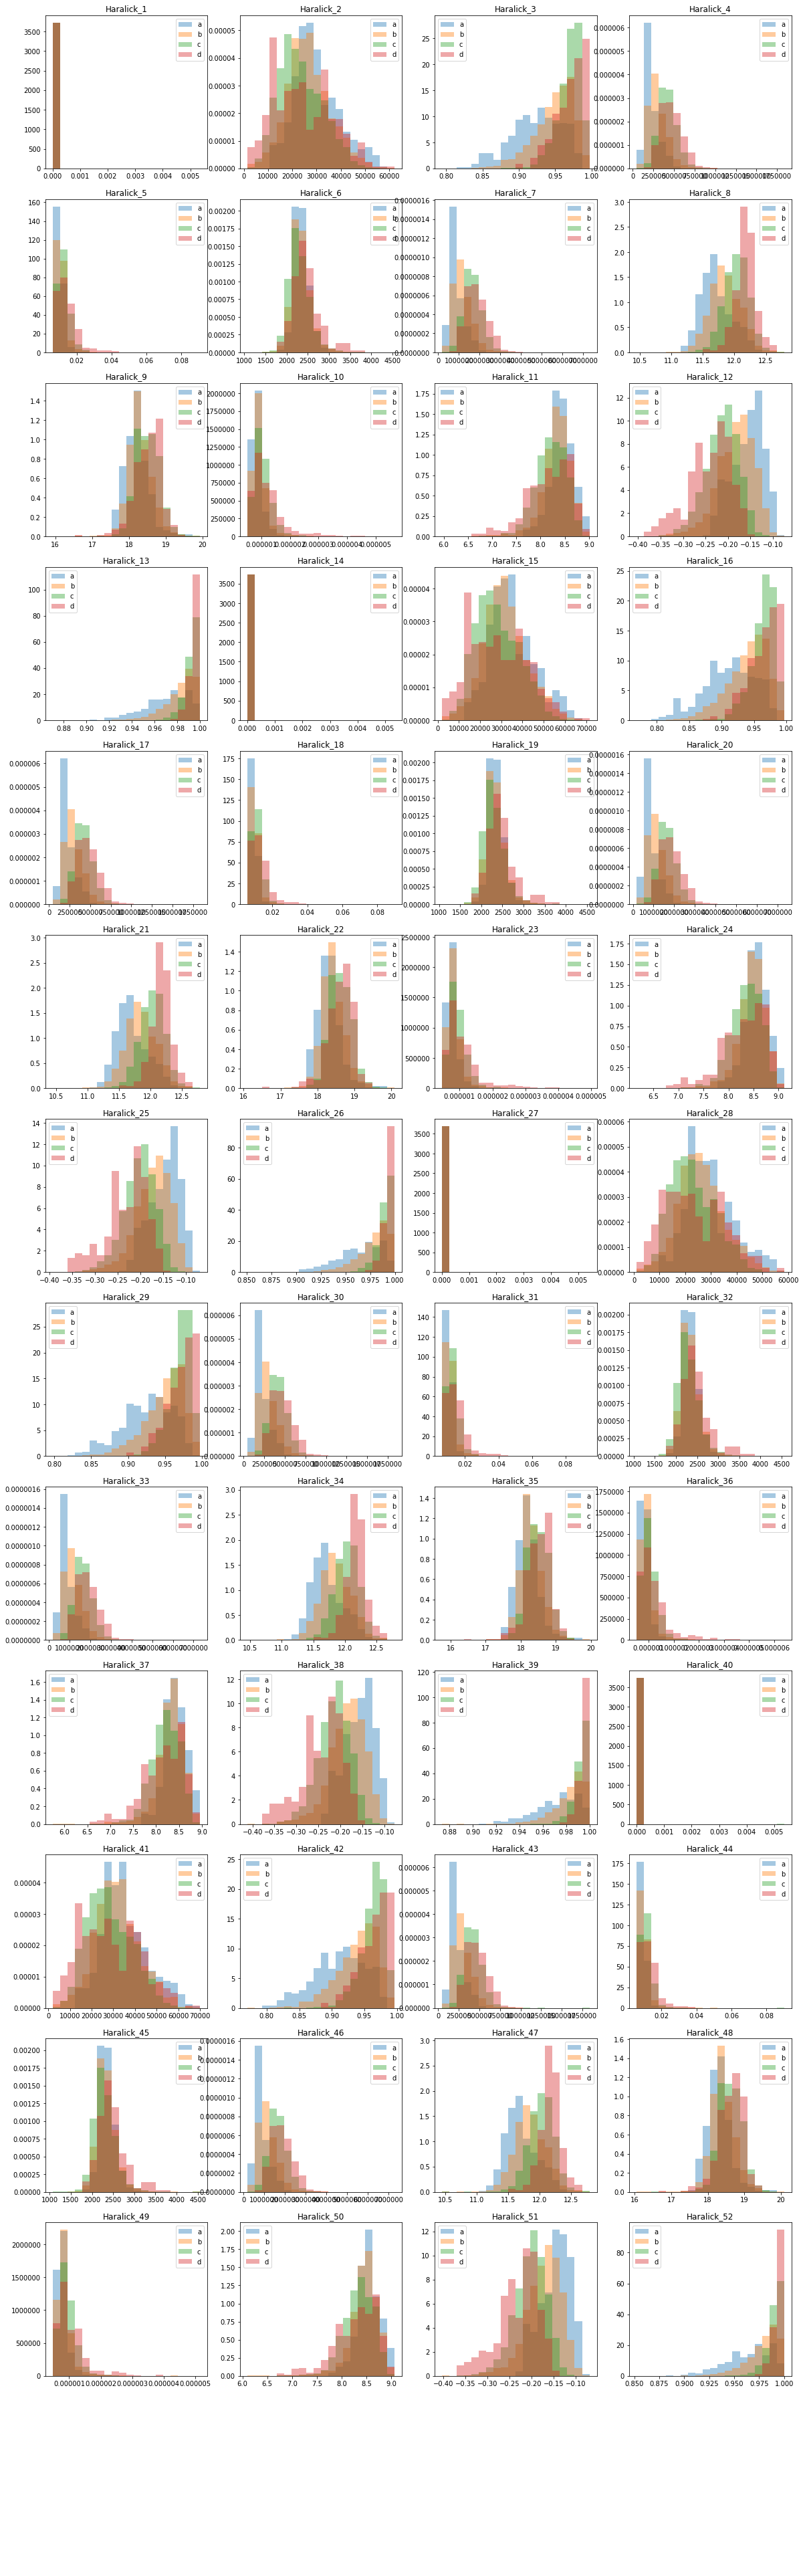

In [22]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

De las columnas correspondientes a las características Haralick 
(las cuales son un conjunto de medidas de textura basadas en la matriz de  niveles de grices, aquí 
 indicadas como 'Haralick_features'),creemos que no aportarían a la clasificación ACR las columnas: 
    Haralick_1  / _14 / _27 / _40 /. (Aunque hay un outlier evidente de tamaño muy superior a los demás,antes de sacar toda la columna, ver si sacándolo, se distinguen las distintas distribuciones.

In [44]:
# Eliminamos dichas columnas del análisis de la base de datos:
Haralick_features.remove('Haralick_1')
Haralick_features.remove('Haralick_14')
Haralick_features.remove('Haralick_27')
Haralick_features.remove('Haralick_40')
#Se eliminan 4 columnas de Haralick 

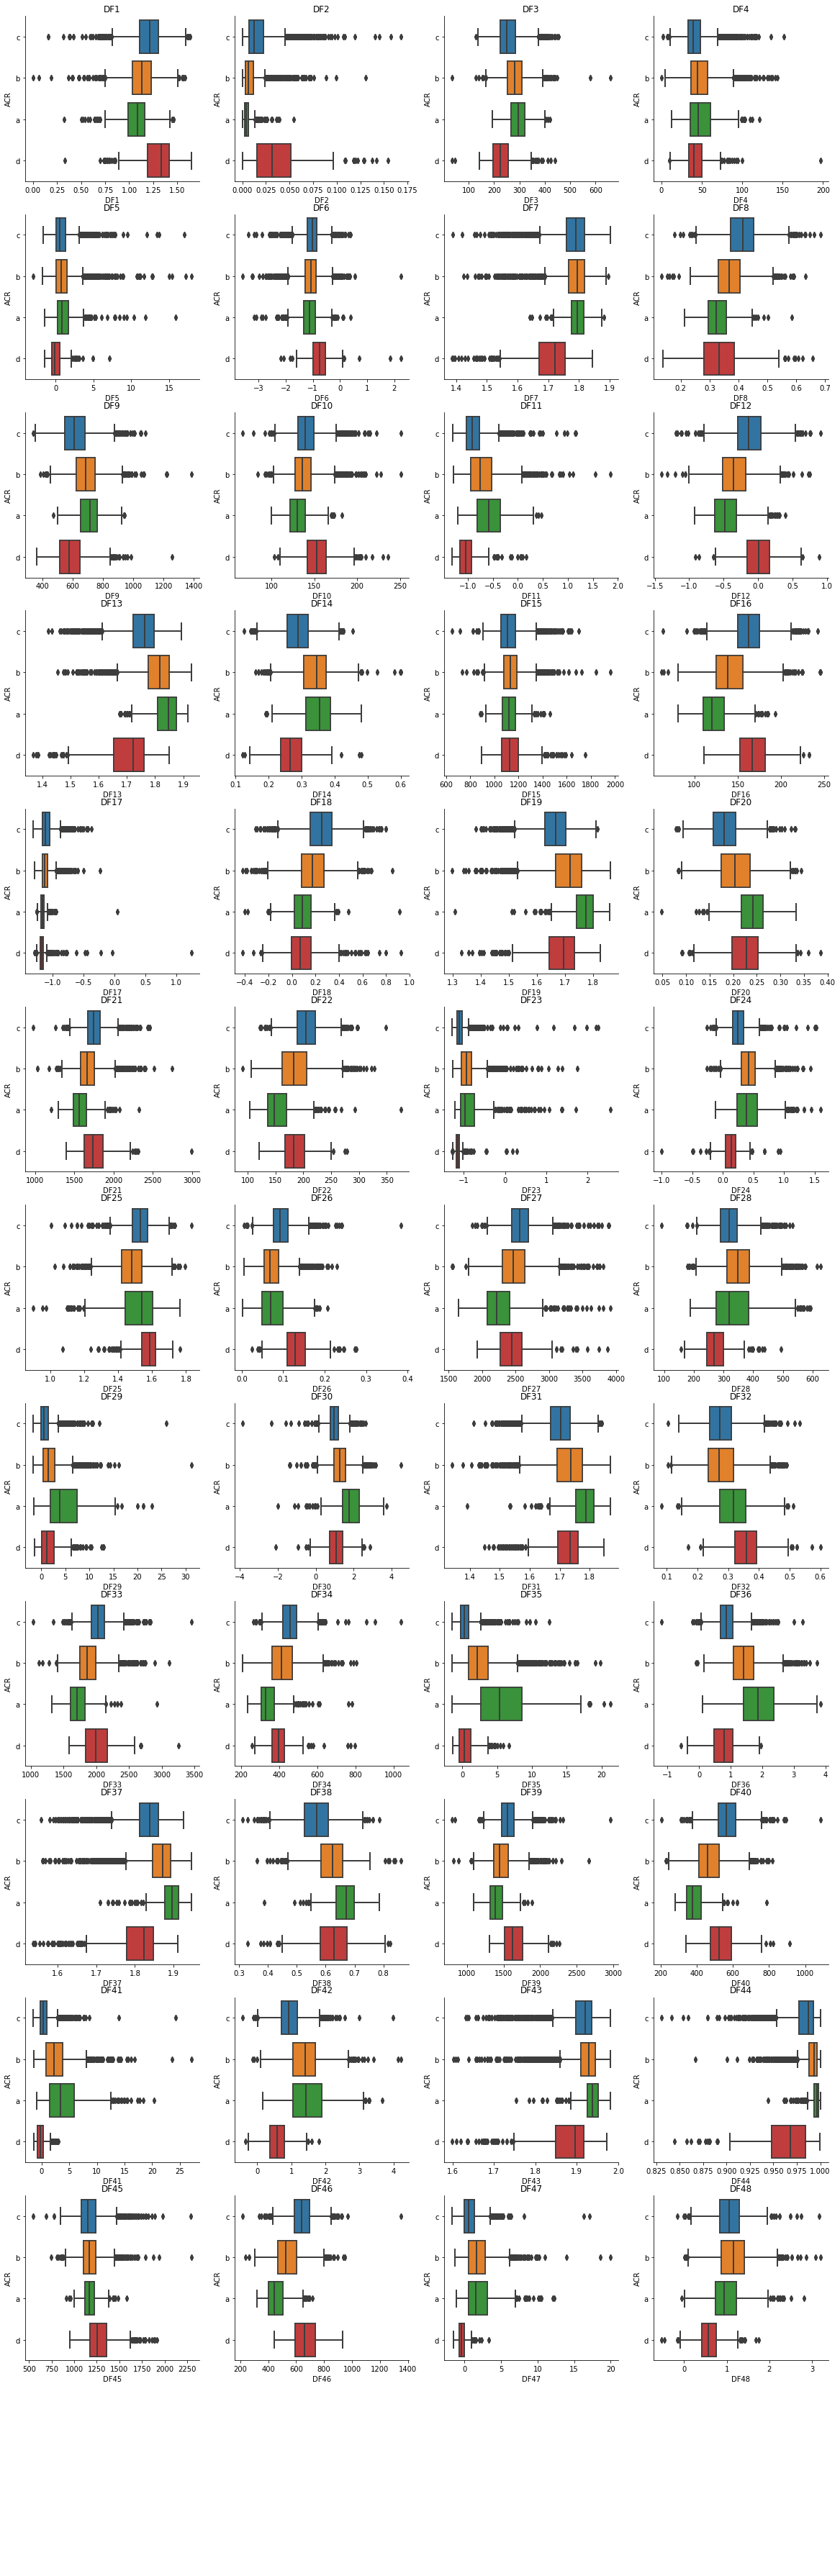

In [24]:
#DF: Características relacionadas a la dimensión fractal de la imagen. 

ntot = len(DF_features)
ny = 4
nx = int(ntot/ny) + 1

acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DF_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(acr_tp,Names):
        sns.boxplot(x=feature,data=data,y="ACR",ax=ax)
    ax.set_title(feature)
       
for ax in axes.flat[ntot:]:
    ax.axis("off")
sns.despine()



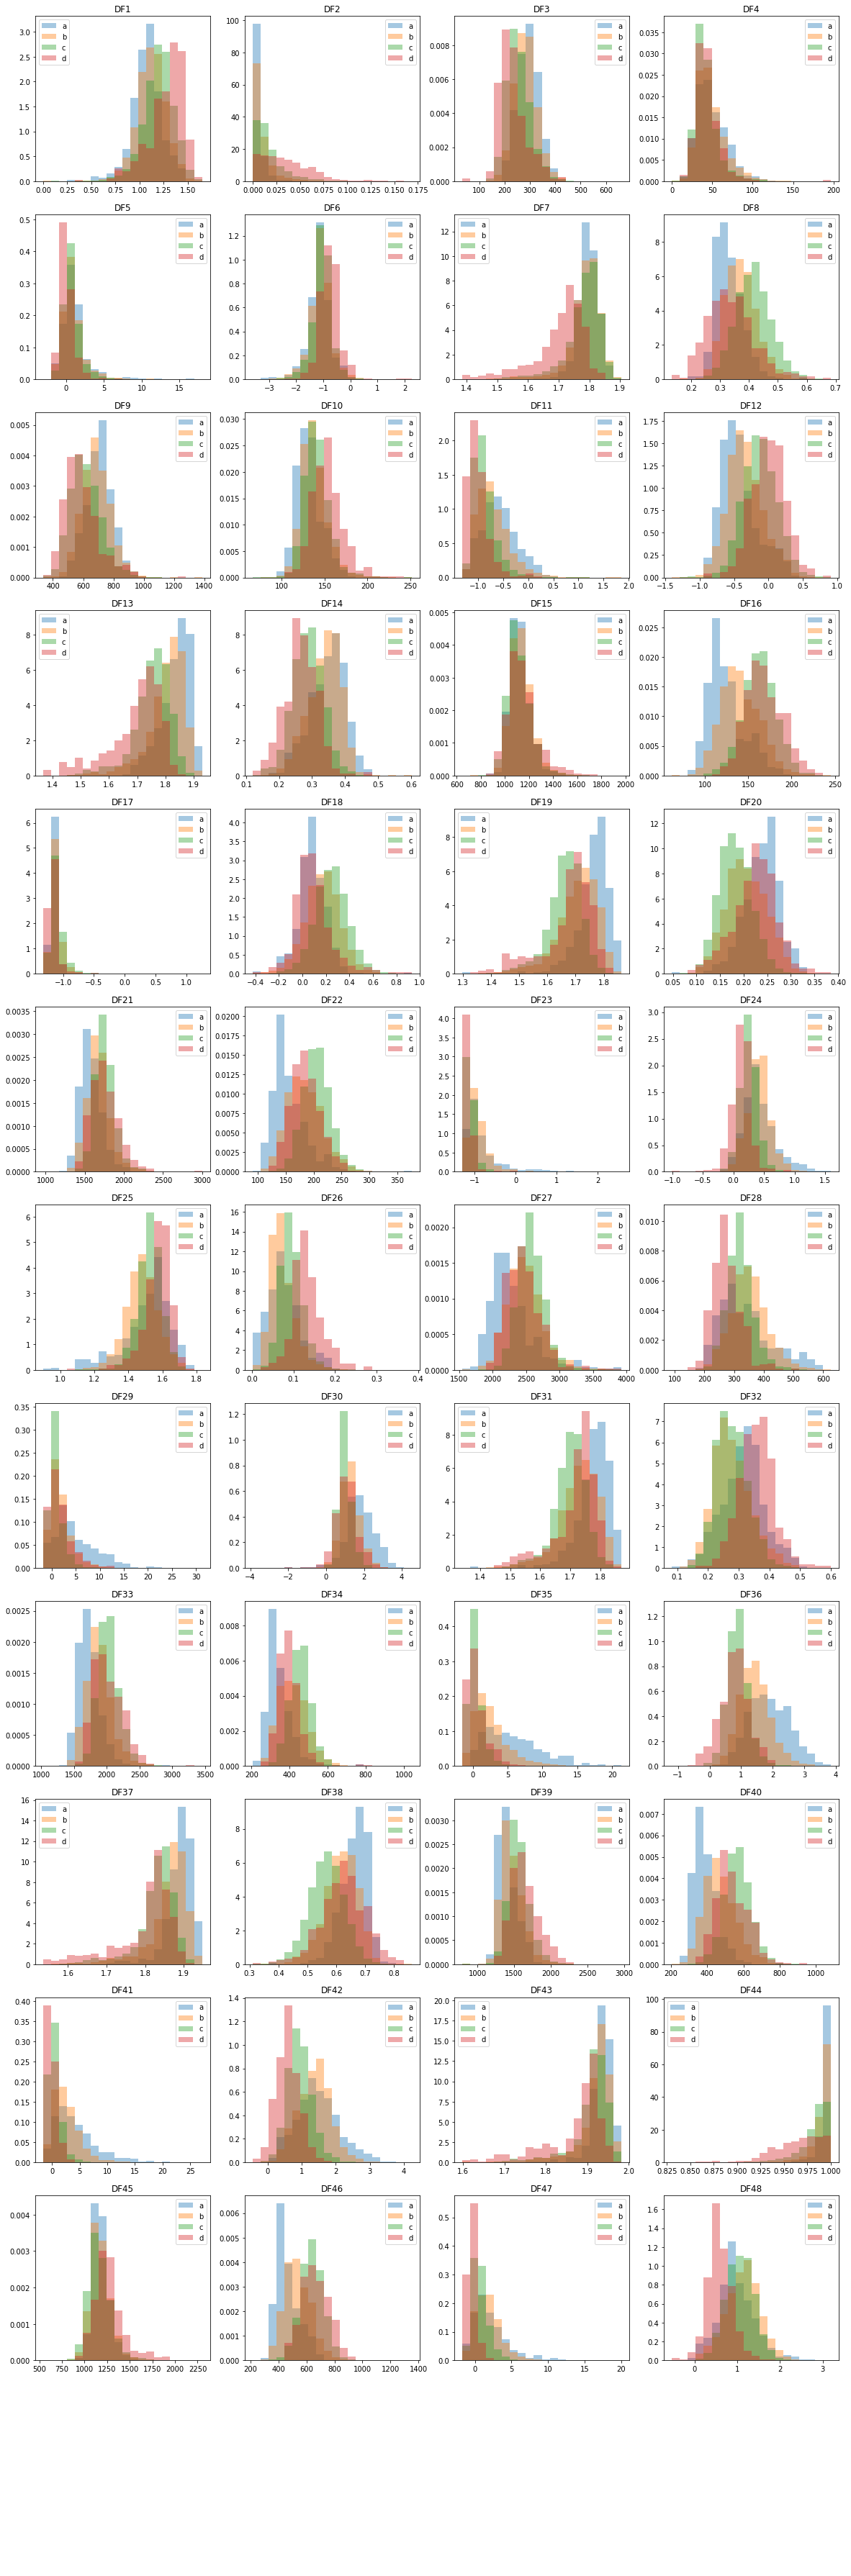

In [45]:
ntot = len(DF_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DF_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

Decidimos conservar todas las columnas correspondientes a las características relacionadas a la dimensión fractal de la imagen (denotada como DF en la database).

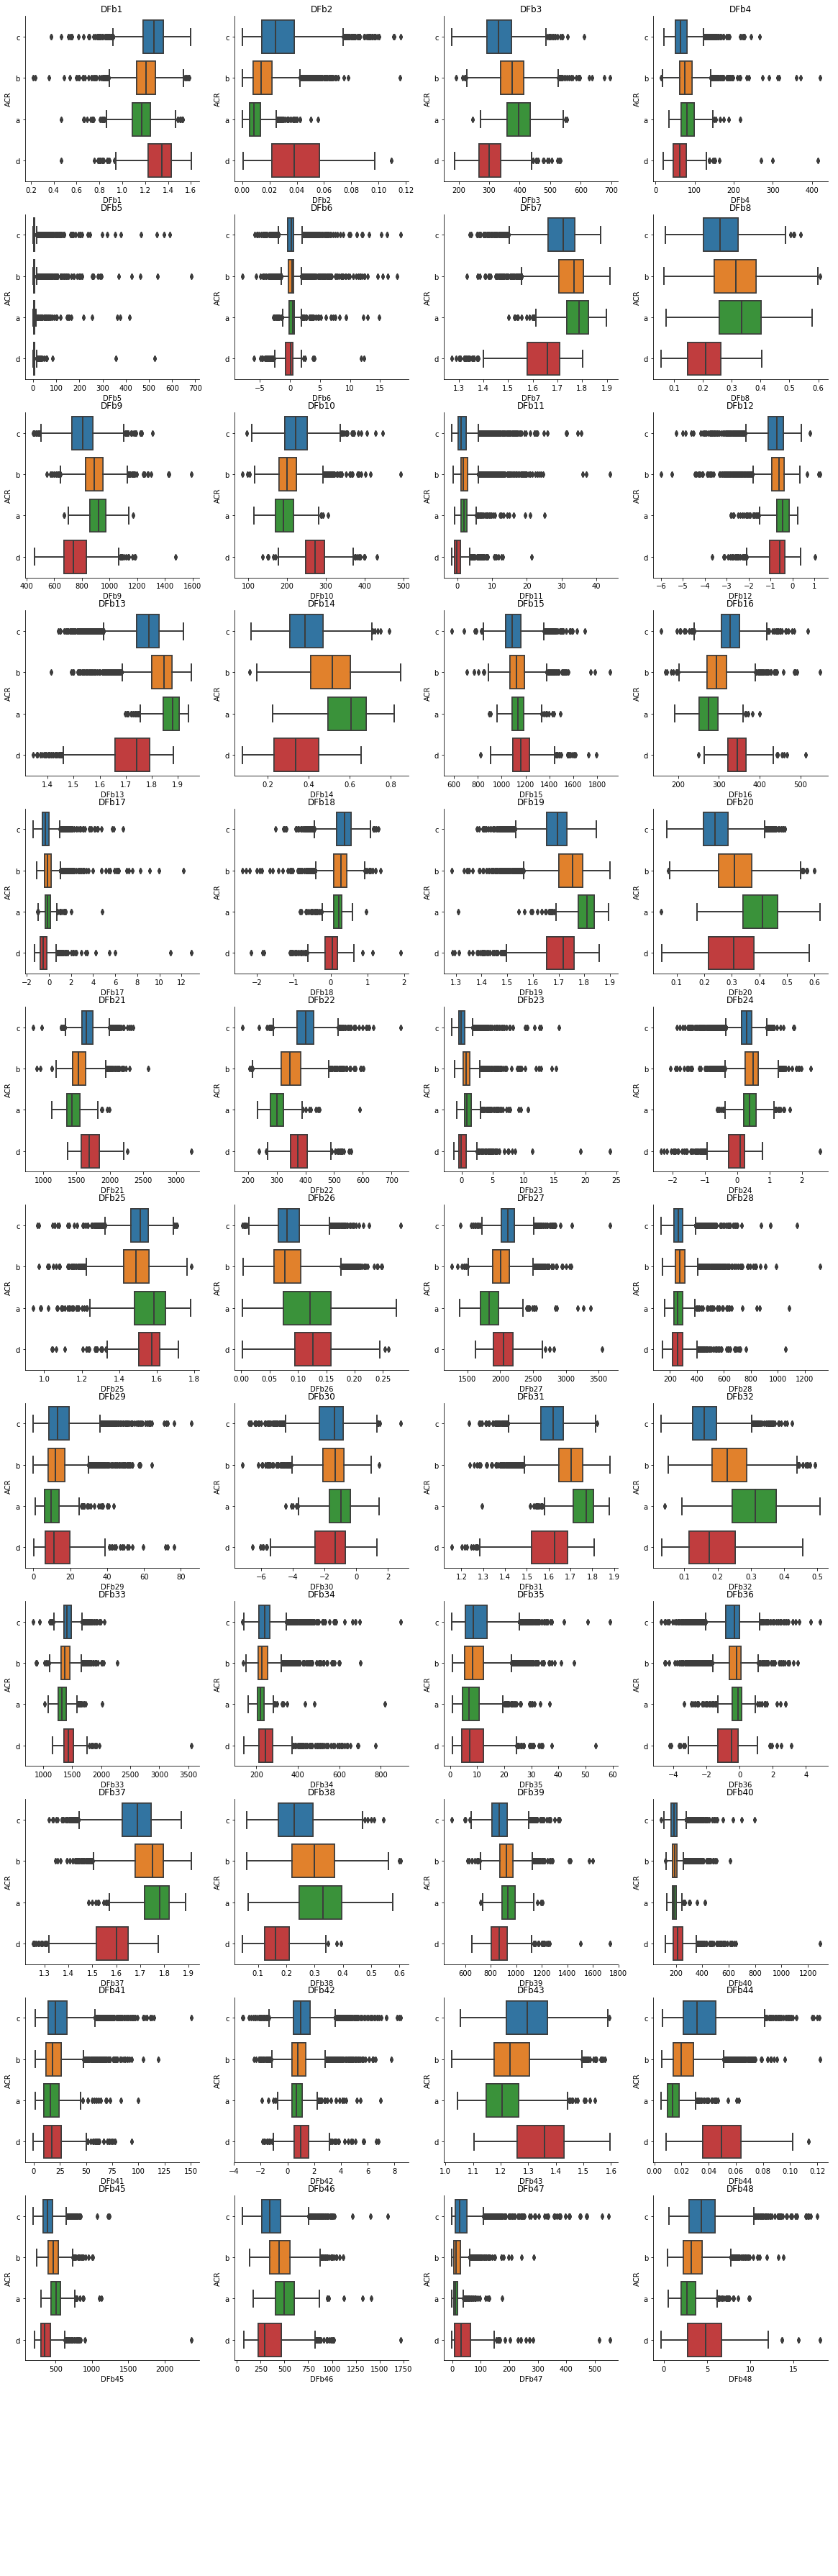

In [46]:
#DFb: Características relacionadas a la dimensi´on fractal de los bordes de la imagen.
ntot = len(DFb_features)
ny = 4
nx = int(ntot/ny) + 1

acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DFb_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(acr_tp,Names):
        sns.boxplot(x=feature,data=data,y="ACR",ax=ax)
    ax.set_title(feature)
       
for ax in axes.flat[ntot:]:
    ax.axis("off")
sns.despine()


In [ ]:
ntot = len(DFb_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DFb_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

Decidimos conservar todas las columnas correspondientes a las características relacionadas a la dimensión 
fractal de los bordes de la imagen(denotada como DFb en la database). 


In [ ]:
#DFb_features.remove('DFb5') # o si?
#DFb_features.remove('DFb6') # o si?
#tienen muchos outliers, no nos decidimos si descartarlas dichas columnas

In [ ]:
ntot = len(Others_features)
ny = 4
nx = int(ntot/ny) + 1

acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Others_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(acr_tp,Names):
        sns.boxplot(x=feature,data=data,y="ACR",ax=ax)
    ax.set_title(feature)
       
for ax in axes.flat[ntot:]:
    ax.axis("off")
sns.despine()



In [ ]:
ntot = len(Others_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Others_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

Decidimos conservar todas las columnas correspondientes a las características restantes, denotadas como 'Others_features'

 Luego de un primer análisis exploratorio de las variables numéricas, mediante histogramas y diagramas de caja, descartamos 10 columnas (6 de características DICOM y 4 de Haralick) ya que las mismas eran mono-valuadas y por lo tanto no aportarían a la clasificación. 



**2-Describir el tipo de las variables presentes en la base, analizar su distribución e identificarlas si es posible.**

* ACR (clasificación BI-RADS del Colegio Americano de Radiología)* 


*   DICOM (Digital Imaging and Communication in Medicine) es el estándar para el intercambio de imágenes médicas. 

*Un elemento de DICOM que es particularmente importante desde el punto de vista de los infor-
mes radiológicos es la función de visualización estándar en escala de grises (GSDF).*  **Cuál será?**

*  entropía de permutaciones es importante



(creo que deberíamos explorar un poco mas para ver si encontramos algo similar a lo que hallaron las chicas hay q ver si encontramos algo así)

Las características indicadas con el prefijo *Dcm*  se corresponden con los datos DICOM (Digital Imaging and Communication in Medicine) que es el formato estándar para el intercambio de
imágenes médicas y se tienen 22  columnas enumeradas. Si bien nos han detallado los nombres de las columnas, no conocemos su correspondencia directa con los detallados en https://dicom.innolitics.com/ciods/digital-mammography-x-ray-image. 

Columnas: 
Edad de la paciente 

Vista:
 CC:Vista craneo caudal de la imagen)
 MLO: Vista oblicua mediolateral. 
 IDMLO: Vista oblicua mediolateral en pacientes con pr´otesis

Lateralidad  --> Dcm_0 # (?) no lo veo
 R: derecha.
 L: izquierda.

KVP  --> Dcm_1
Kilo voltaje pico de salida del generador. 


XRCurrent  --> Dcm_2
Corriente del tubo de rayos X medida en mili Amperes.

Exposure  --> Dcm_3
Exposición: Corriente del tubo de rayos X medida en mili Amperes por segundo.

ExposureTime  --> Dcm_4
Tiempo de exposición: Duración de la exposición a los rayos X medida en mili segundos.

FilterMaterial  --> Dcm_5
Material del filtro: • Plata • Aluminio • Molibdeno • Rodio

FilterThickness  --> Dcm_6
Espesor del filtro


FocalSpots  --> Dcm_7
Punto focal: Tamañoo nominal del punto focal en mm utilizado para adquirir la imagen.

AnodeTargetMaterial  --> Dcm_8
Material del blanco del ´anodo:Puede estar construido de: • Tungsteno • Molibdeno • Rodio

BodyPartThickness  --> Dcm_9
Espesor de la mama: El grosor promedio en mm de la parte del cuerpo examinada cuando se comprime, si se ha aplicado compresión durante la exposición.

CompressionForce  --> Dcm_10
Fuerza de compresión: La fuerza de compresión aplicada a la parte del cuerpo durante la exposición, medida en Newtons

DistanceSourceDetector  --> Dcm_11
Distancia de la fuente al detector: Distancia en mm desde la fuente hasta el centro del detector

DistanceSourcePatient  --> Dcm_12
Distancia de la fuente al paciente

EstimatedMagnification  --> Dcm_13
Estimaci´on de la magnificación

PositionerPrimaryAngle  --> Dcm_14
Angulación primaria del posicionador: Distancia en mm desde la fuente hasta la mesa, el lado de apoyo más cercano al sujeto de imagen, medido a lo largo del rayo central del haz de rayos X.

ExposureControlMode  --> Dcm_15
Modo de control de la exposición: Existen tres posibles configuraciones: • Automático. • Autofiltrado. • Manual.

ExposureControlModeDescrip  --> Dcm_16
Descripción del modo de control de la exposición

RelativeXRExposure  --> Dcm_17
Exposici´on relativa a los rayos X.

EntranceDoseInmGy  --> Dcm_18
Dosis de entrada: El valor medio de la dosis de entrada medido en mili Gray en la superficie del paciente durante la adquisici´on de esta imagen.

OrganDose  --> Dcm_19
Dosis que recibe el órgano expuesto a la radiación: Valor medio de la dosis en el órgano medido en deci Gray durante la adquisición de esta imagen.

HalfValueLayer  --> Dcm_20
Capa de valor medio: Grosor del aluminio en mm requerido para reducir la salida de rayos X en un factor de dos.

WindowCenter  --> Dcm_21
WindowWidth  --> Dcm_22

BreastImplantPresent  --> Dcm_23
Presencia de implante mamario: Puede tomar dos valores: • Sí. • No.


Los datos correspondientes al *Histograma global* serán 'Promedio', 'Mediana', 'Desviación estándar', 'Asimetría', 'Kurtosis' y 'Moda' ? (estos valores.... son de calcular la DF o de hacer histograma?? )

*de las cuales en el trabajo realizado se propone que 
(debeberíamos corroborarlo por ACR ?)
*  La desviación estándar va aumentando a medida que aumenta la densidad (datos con mayor dispersión alrededor de la media).
*   La asimetríıa va disminuyendo a medida que aumenta la densidad (aumenta la simetría de la curva) 
*   La curtosis va disminuyendo a medida que aumenta la densidad (va disminuyendo el grado de apuntamiento de la distribución). * 



Los datos correspondientes al *Histograma local* serán 'desviación estándar'  y  'asimetría' de las 3 partes centrales (la del 40 %, el 70% y el 90 %, denotadas como  (L1, L2 y L3), que son las columnas
'Desvío_L1', 'Desvío_L2','Desvío_L3' y 'Asimetría_L1','Asimetría_L2' y 'Asimetría_L3'

*De estos ejemplos se puede observar cómo los valores de desviación van aumentado con la densidad, y por el contrario los de asimetría disminuyen.* 



Cuando se aplica el operador gradiente a una imagen (columna promGradiente:una característica que representa el promedio de niveles de grises de la imagen gradiente).

*Si a la imagen resultante se umbraliza (utilizando un umbral fijo), se notará que las mamografías correspondientes a la clase A tienen pocos píxeles blancos en comparación al total. Por lo tanto esa relación entre cantidad de píxeles blancos y totales se la extrae como una característica más*



Por otro lado luego de visualizar las imágenes umbralizadas, se observó que si se las divide en
porciones como en el análisis anterior y se calculan las relaciones entre píxeles blancos y totales de esa región particular, se obtendrán valores que pueden resultar significativos para la clasificación
(Relación 20/40/70/90  -> Relación L_1/L2_/L_3/L_4). *Relación no es el promedio! Entonces? Es de promGradiente?*

*En esta etapa se pueden plantear las siguientes hipótesis:
El promedio de la imagen gradiente aumenta a medida que aumenta la densidad (mayor cam- bios en la textura). Las relaciones entre cantidad de p´ıxeles blancos y totales aumenta con la densidad.* me pa q a algo así deberíamos llegar... 

Entropía de permutaciones (EP) (la calcularon por [31?] ) Luego de aplicar este algoritmo a varias imágenes se ha notado que no hay mucha variaci´on en los valores obtenidos según sea la clase de mamografía. Sin embargo, de este análisis surgió la idea de calcular la entropía de permutaciones a la imagen que resulta de aplicar el gradiente (asumo EP) y umbralización (asumo EPbinaria).
Tb  se analizó la relación entre la cantidad de celdas en las cuales su entropía resultó igual a cero y la cantidad de celdas totales analizadas (Asumo RelEntropia)
    *Hipótesis planteadas:La entropía de permutaciones calculada en la imagen binaria aumenta levemente a medida que aumenta la densidad. La relaci´on entre celdas con entropía cero y totales disminuye con el aumento de densidad.*
    

Descriptores de textura de Haralick: se calculan trece de las catorce características de Haralick [25] en las cuatro direcciones de las imágenes bidimensionales, obteniendo una matriz de dimensión 4 × 13.
son un conjunto de medidas de textura basadas en la matriz de co-ocurrencia (o de niveles de gris). Son de naturaleza estadística y para su cálculo, es necesario asumir que la totalidad de la información textural de una imagen está contenida en las relaciones espaciales que se dan entre los distintos niveles de gris de un objeto.
Esas relaciones están especificadas en la matriz de co-ocurrencia espacial que son computadas en una dirección específica, o bien para todas: 0◦, 45◦, 90◦ y 135◦, entre los píxeles vecinos dentro de una ventana móvil dentro en la imagen. La matriz de co-ocurrencia describe la frecuencia de un nivel de gris que aparece en una relación
espacial específica con otro valor de gris (píxel de referencia y píxel vecino), dentro del área de una ventana determinada. Es un resumen de la forma en que los valores de los píxeles ocurren al lado de otro valor en una pequeña ventana. 
Este método permite extraer una gran cantidad de información de textura de imagen por la gran
variedad de descriptores que es posible obtener de esta matriz, que hacen posible caracterizar con un conjunto de valores cuantificables cada imagen analizada (descripción de los 13 en la página 57)

DF: Características relacionadas a la dimensión fractal de la imagen. 
El vector de características de la dimensión fractal estará acompañado de otros valores. Éstos son: 
* Área (cantidad de píxeles que forman la imagen binaria).
* Promedio de nivel de gris. Esto es el promedio de nivel de gris en I (x, y) en el área delimitada por la segmentación que corresponda. 
* Desvío estándar de los valores de grises. 
* Curtosis. 
* Asimetría. 
* Entropía.(??? será q coincide con EP ? no... no la toman nomas me pa)
Moda?? NO TOMAN ESOS VALORES PARA LAS COLUMNAS!



DFb: Características relacionadas a la dimensi´on fractal de los bordes de la imagen.
En lo único que difiere respecto al procedimiento anterior es que entre los items 2 y 3 se buscaron los bordes de las imágenes.

Finalmente se obtuvo un vector de las mismas características que el anterior.
*Hipótesis planteadas: Cuando hay un alto grado de densidad mamogr´afica, la imagen aparecer´a m´as suave, lo que deber´ıa reflejarse en una dimensión fractal más baja. Una imagen de un seno con un pequeño grado de densidad tendrá una textura más grosera,debido al buen contraste entre el tejido conectivo y el tejido glandular predominantemente graso, por lo cual se espera que la dimensi´on fractal sea mayor.*




*A partir de las definiciones dadas y el estudio de los de los reportes y las matrices de confu-
si´on, se pueden destacar tanto las caracter´ısticas extra´ıdas del histograma (ver Figura 4.1.1) como las relacionadas con la dimensi´on fractal (ver Figura 4.1.11 y 4.1.13), las mismas demostraron que la informaci´on que aportan en la descripci´on de la imagen es suficiente para obtener una buena clasifi- caci´on de los datos. Adem´as, a excepci´on de la entrop´ıa de permutaciones (ver Figura 4.1.9), todos los descriptores de
textura dieron resultados satisfactorios. ´Estos son: caracter´ısticas extra´ıdas de la imagen de los valores del m´odulo de del gradiente, descriptores de Haralick y dimensi´on fractal. De esta manera, podemos afirmar que se cumpli´o uno de nuestros objetivos: demostrar que existe una relaci´on entre la textura de la imagen y la densidad radiol´ogica de la misma.* (conclusión de las chicas!)


**2-Describir el tipo de las variables presentes en la base, analizar su distribución e identificarlas si es posible.**

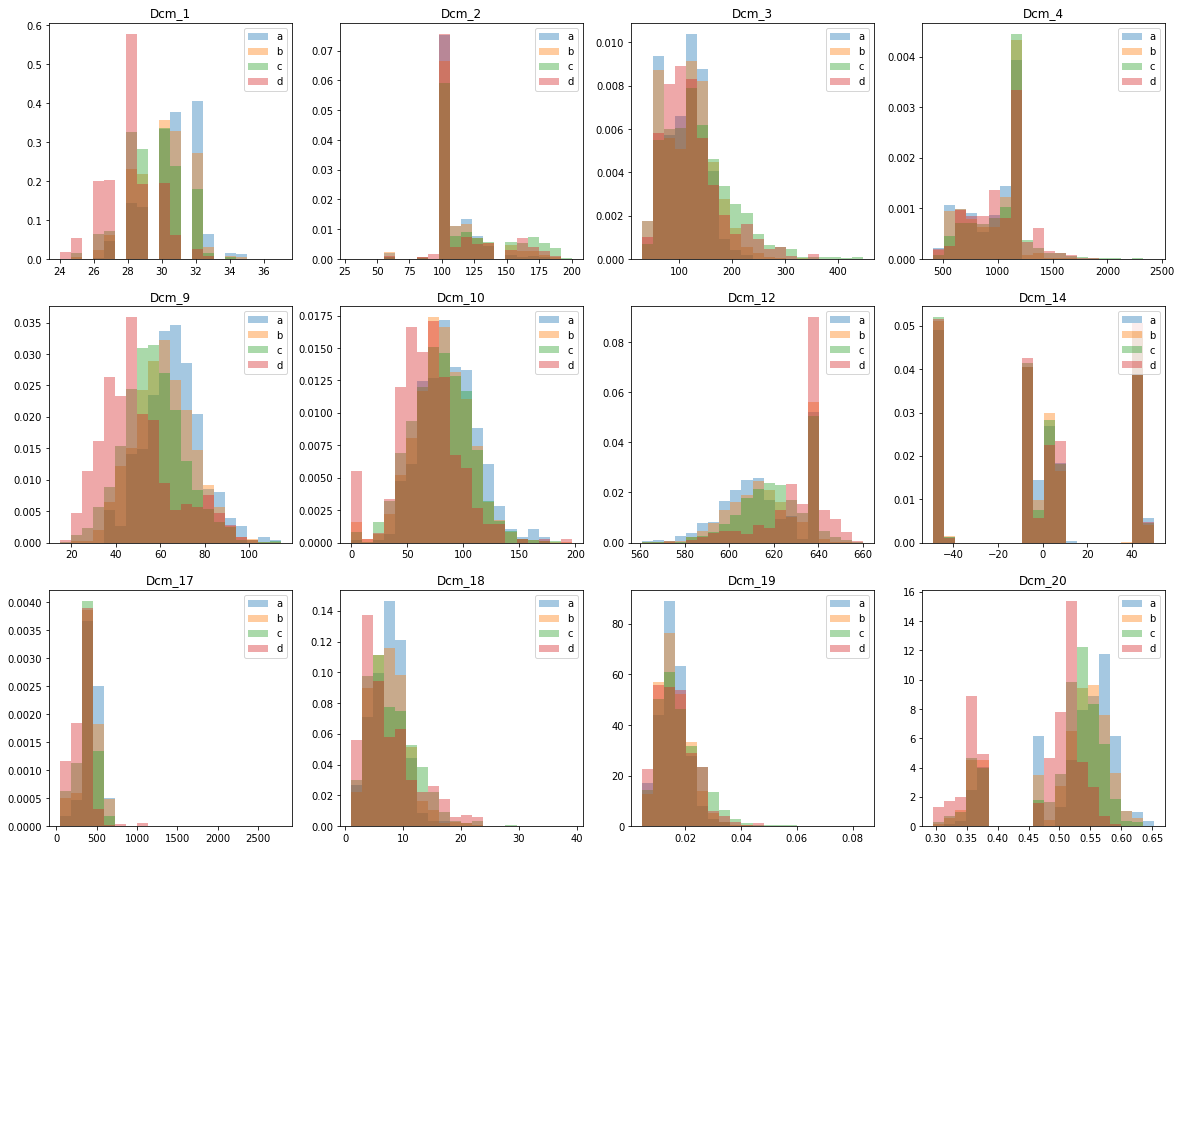

In [47]:
#
ntot = len(Dicom_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Dicom_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

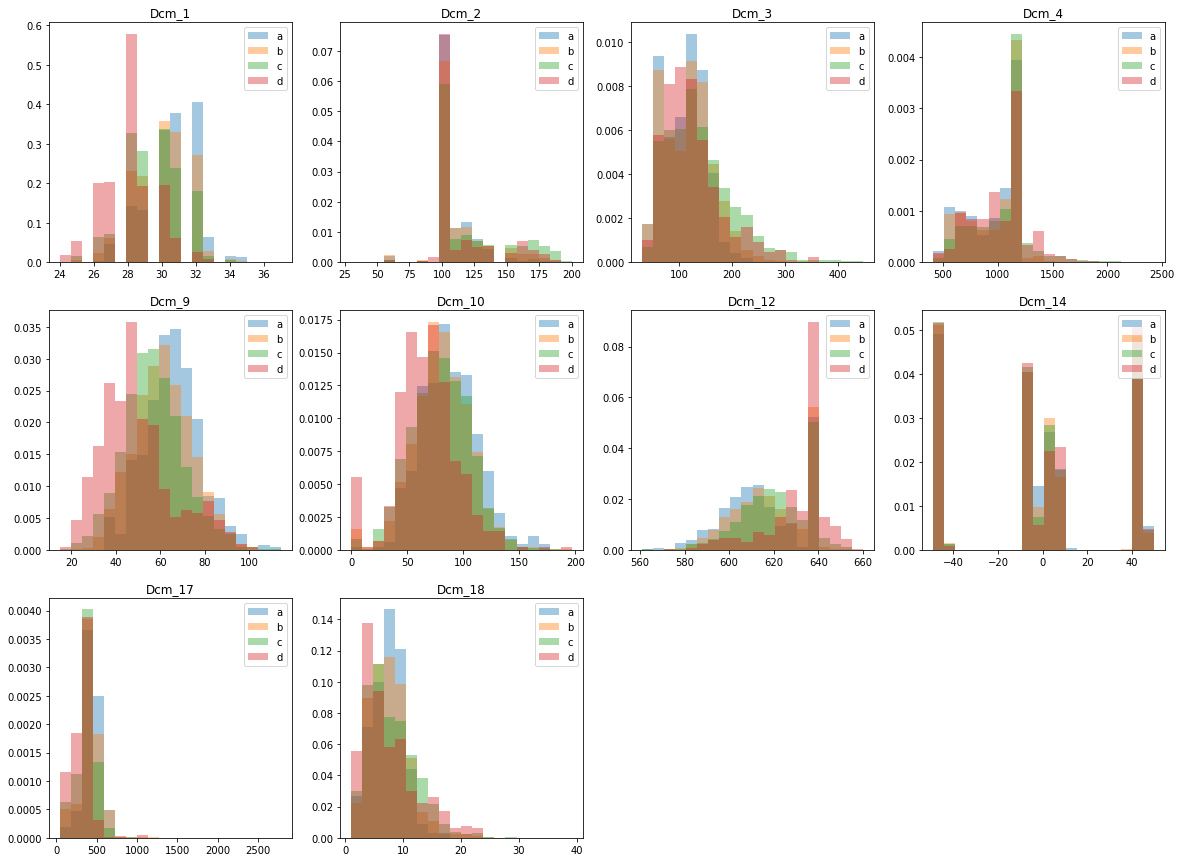

In [48]:
ntot = 10#len(Dicom_features)
ny = 4
nx = int(ntot/ny) + 1

#Views = [CC,MLO,MLOID]
#Names = ["CC","MLO","MLOID"]
acr_tp = [a_cm,b_cm,c_cm,d_cm]
Names = ["a","b","c", "d"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Dicom_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for acr,name in zip(acr_tp,Names):
        ax.hist(data[feature][acr],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [ ]:
DC1 = Dicom_features[:5]
DC1.append('ACR')

sns.pairplot(data[DC1],hue='ACR')
sns.despine()

DC1 contiene las columnas ['Dcm_1', 'Dcm_2', 'Dcm_3', 'Dcm_4', 'Dcm_6', 'ACR']. 

KVP  --> Dcm_1
Kilo voltaje pico de salida del generador. 

XRCurrent  --> Dcm_2
Corriente del tubo de rayos X medida en mili Amperes.

Exposure  --> Dcm_3
Exposición: Corriente del tubo de rayos X medida en mili Amperes por segundo.

ExposureTime  --> Dcm_4
Tiempo de exposición: Duración de la exposición a los rayos X medida en mili segundos.


BodyPartThickness  --> Dcm_9
Espesor de la mama: El grosor promedio en mm de la parte del cuerpo examinada cuando se comprime, si se ha aplicado compresión durante la exposición.



In [ ]:
DC2 = Dicom_features[5:10]
DC2.append('ACR')
sns.pairplot(data[DC2],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()

DC2 contiene las columnas ['Dcm_10', 'Dcm_12', 'Dcm_14', 'Dcm_17', 'Dcm_18', 'ACR']

CompressionForce  --> Dcm_10
Fuerza de compresión: La fuerza de compresión aplicada a la parte del cuerpo durante la exposición, medida en Newtons

DistanceSourcePatient  --> Dcm_12
Distancia de la fuente al paciente

PositionerPrimaryAngle  --> Dcm_14
Angulación primaria del posicionador: Distancia en mm desde la fuente hasta la mesa, el lado de apoyo más cercano al sujeto de imagen, medido a lo largo del rayo central del haz de rayos X.

RelativeXRExposure  --> Dcm_17
Exposición relativa a los rayos X.

EntranceDoseInmGy  --> Dcm_18
Dosis de entrada: El valor medio de la dosis de entrada medido en mili Gray en la superficie del paciente durante la adquisici´on de esta imagen.



In [ ]:
DC3 = Dicom_features[10:15]
DC3.append('ACR')
sns.pairplot(data[DC3],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()

DC3 contiene ['Dcm_19', 'Dcm_20', 'ACR']

OrganDose  --> Dcm_19
Dosis que recibe el órgano expuesto a la radiación: Valor medio de la dosis en el órgano medido en deci Gray durante la adquisición de esta imagen.

HalfValueLayer  --> Dcm_20
Capa de valor medio: Grosor del aluminio en mm requerido para reducir la salida de rayos X en un factor de dos.






Del conjunto DC1, la que mejor nos permite distinguir las cuatro clases es la Dcm_9 que se refiere al 
espesor de la mama y se observa una posible correlación positiva con las demás columnas, siendo la mas 
evidente por tramos con Dcm_1 que se refiere al Kilo voltaje pico de salida del generador. 

Las variables Dcm_2, Dcm_3 y Dcm_4, a nivel exploratorio no permiten distinguir entre las 4 
categorías de 'ACR' y además se observa una correlación positiva por tramos, las cuales se refieren 
a la exposicion de rayosX. 

Del conjunto DC2, la Dcm_17 que es la correspondiente a la exposición relativa a los RX no 
permite una posible separación entre las clases. La variable Dcm_14 que se refiere al ángulo del posicionador 
y habría que ver si se observa correlación con la columna "View".

Del conjunto DC3, la Dcm_20 que se refiere al grosor del alumnio presenta una distribución bimodal y 
permite distinguir las  categorías "ACR".


In [ ]:
#!pip install scipy

In [ ]:
DC4 = Dicom_features
DC4.append('ACR')
sns.pairplot(data[DC4],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()



KVP  --> Dcm_1
Kilo voltaje pico de salida del generador. 


XRCurrent  --> Dcm_2
Corriente del tubo de rayos X medida en mili Amperes.

Exposure  --> Dcm_3
Exposición: Corriente del tubo de rayos X medida en mili Amperes por segundo.

ExposureTime  --> Dcm_4
Tiempo de exposición: Duración de la exposición a los rayos X medida en mili segundos.

FilterMaterial  --> Dcm_5
Material del filtro: • Plata • Aluminio • Molibdeno • Rodio

FilterThickness  --> Dcm_6
Espesor del filtro


FocalSpots  --> Dcm_7
Punto focal: Tamañoo nominal del punto focal en mm utilizado para adquirir la imagen.

AnodeTargetMaterial  --> Dcm_8
Material del blanco del ´anodo:Puede estar construido de: • Tungsteno • Molibdeno • Rodio

BodyPartThickness  --> Dcm_9
Espesor de la mama: El grosor promedio en mm de la parte del cuerpo examinada cuando se comprime, si se ha aplicado compresión durante la exposición.

CompressionForce  --> Dcm_10
Fuerza de compresión: La fuerza de compresión aplicada a la parte del cuerpo durante la exposición, medida en Newtons

DistanceSourceDetector  --> Dcm_11
Distancia de la fuente al detector: Distancia en mm desde la fuente hasta el centro del detector

DistanceSourcePatient  --> Dcm_12
Distancia de la fuente al paciente

EstimatedMagnification  --> Dcm_13
Estimaci´on de la magnificación

PositionerPrimaryAngle  --> Dcm_14
Angulación primaria del posicionador: Distancia en mm desde la fuente hasta la mesa, el lado de apoyo más cercano al sujeto de imagen, medido a lo largo del rayo central del haz de rayos X.

ExposureControlMode  --> Dcm_15
Modo de control de la exposición: Existen tres posibles configuraciones: • Automático. • Autofiltrado. • Manual.

ExposureControlModeDescrip  --> Dcm_16
Descripción del modo de control de la exposición

RelativeXRExposure  --> Dcm_17
Exposici´on relativa a los rayos X.

EntranceDoseInmGy  --> Dcm_18
Dosis de entrada: El valor medio de la dosis de entrada medido en mili Gray en la superficie del paciente durante la adquisici´on de esta imagen.

OrganDose  --> Dcm_19
Dosis que recibe el órgano expuesto a la radiación: Valor medio de la dosis en el órgano medido en deci Gray durante la adquisición de esta imagen.

HalfValueLayer  --> Dcm_20
Capa de valor medio: Grosor del aluminio en mm requerido para reducir la salida de rayos X en un factor de dos.

WindowCenter  --> Dcm_21
WindowWidth  --> Dcm_22

BreastImplantPresent  --> Dcm_23
Presencia de implante mamario: Puede tomar dos valores: • Sí. • No.



, tales como la 'Edad',
'Área'. 

Los datos correspondientes al *Histograma global* son: 'Promedio', 'Media', 'Mediana', 'Desviación estándar', 
    'Asimetría', 'Kurtosis' y 'Moda' .
    
Los datos correspondientes al *Histograma local* serán 'desviación estándar' y 'asimetría' de las 3 partes centrales (la del 40 %, el 70% y el 90 %, denotadas como  (L1, L2 y L3), que son las columnas
'Desvío_L1', 'Desvío_L2','Desvío_L3' y 'Asimetría_L1','Asimetría_L2' y 'Asimetría_L3'
    
    
    
Cuando se aplica el operador gradiente a una imagen, este devuelve otra que puede ser analizada
de la misma manera (columna 'promGradiente': una característica que representa el promedio de niveles de grises de la imagen gradiente).


Por otro lado luego de visualizar las imágenes umbralizadas, se observó que si se las divide en
porciones como en el análisis anterior y se calculan las relaciones entre píxeles blancos y totales de esa región particular, se obtendrán valores que pueden resultar significativos para la clasificación
(Relación 20/40/70/90  -> Relación L_1/L2_/L_3/L_4). *Relación no es el promedio! Entonces? Es de promGradiente?*

Entropía de permutaciones (EP) (la calcularon por [31?] ) Luego de aplicar este algoritmo a varias imágenes se ha notado que no hay mucha variaci´on en los valores obtenidos según sea la clase de mamografía. Sin embargo, de este análisis surgió la idea de calcular la entropía de permutaciones a la imagen que resulta de aplicar el gradiente (asumo EP) y umbralización (asumimos EPbinaria).

También  se analizó la relación entre la cantidad de celdas en las cuales su entropía resultó igual a cero y la cantidad de celdas totales analizadas (Asumimos RelEntropia)
    
    


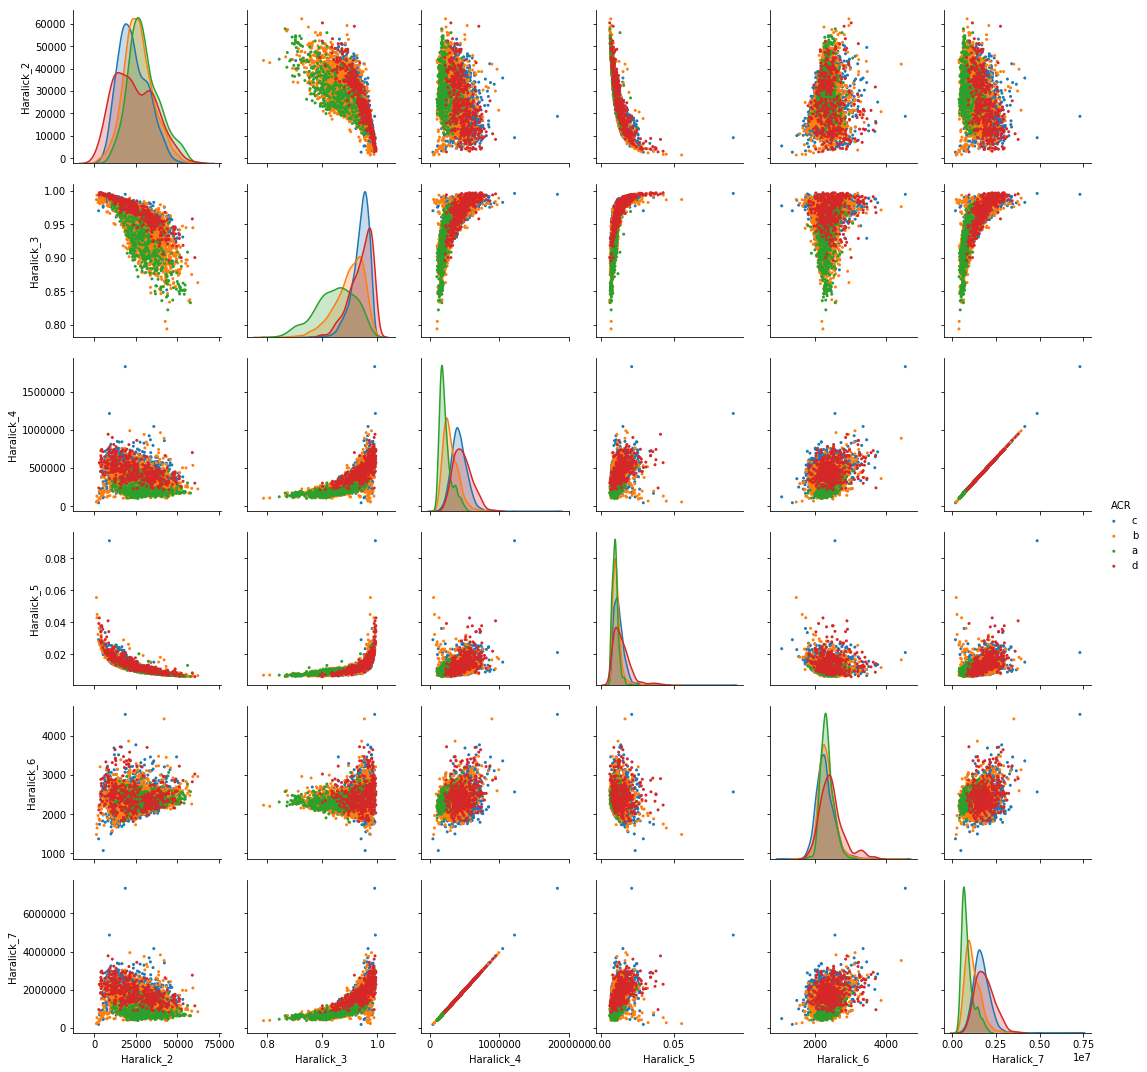

In [54]:
HR1 = Haralick_features[0:6]
HR1.append('ACR')
sns.pairplot(data[HR1],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()

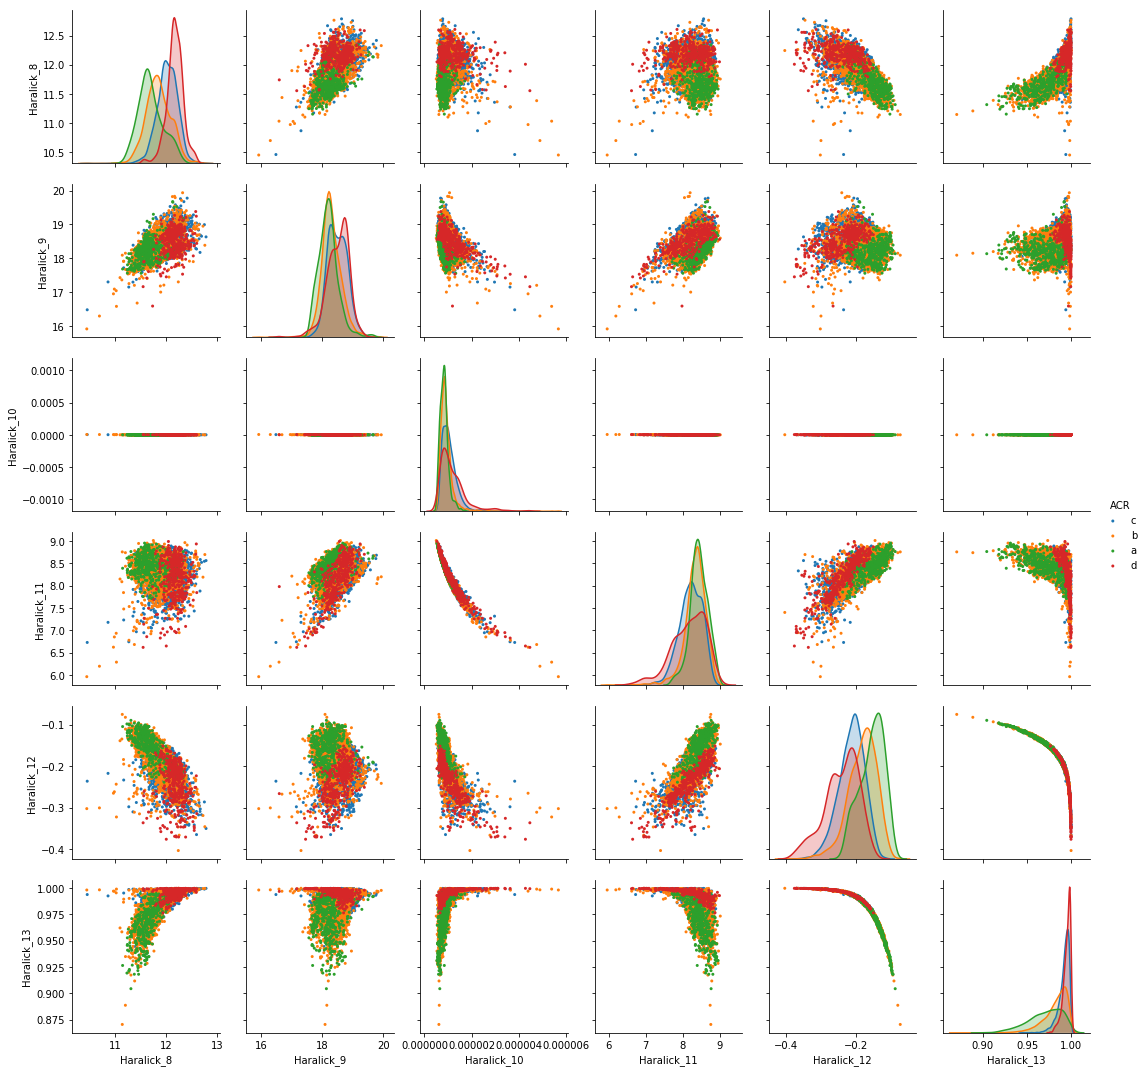

In [75]:
HR2 = Haralick_features[6:12]
HR2.append('ACR')
sns.pairplot(data[HR2],hue='ACR', markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()


In [68]:
#Se corresponde con HR1
#HR3 = Haralick_features[12:18]
#HR3.append('ACR')
#sns.pairplot(data[HR3],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
#sns.despine()

In [69]:
#Se corresponde con HR2
#HR4 = Haralick_features[18:24]
#HR4.append('ACR')
#sns.pairplot(data[HR4],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
#sns.despine()

In [70]:
#Se corresponde con HR1
#HR5 = Haralick_features[24:30]
#HR5.append('ACR')
#sns.pairplot(data[HR5],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
#sns.despine()

In [71]:
#Se corresponde con HR2
#HR6 = Haralick_features[30:36]
#HR6.append('ACR')
#sns.pairplot(data[HR6],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
#sns.despine()

In [72]:
#Se corresponde con HR1
#HR7 = Haralick_features[36:42]
#HR7.append('ACR')
#sns.pairplot(data[HR7],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
#sns.despine()

In [73]:
##Se corresponde con HR2
#HR8 = Haralick_features[42:48]
#HR8.append('ACR')
#sns.pairplot(data[HR8],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
#sns.despine()

In [ ]:
Los desciptores de Haralick permiten distinguir las mamas de la clasificación 'a'

In [0]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
       
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(Haralick_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Haralick_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        #sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        sns.boxplot(data=data,y=feature, x='View', hue='ACR',ax=ax)
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(DF_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DF_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(DF_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DF_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(DFb_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DFb_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(DFb_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],DFb_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View", hue='ACR',ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
ntot = len(Others_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Others_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        ax.hist(data[view][feature],bins=20,density=True,alpha=0.4,label=name,range=(_min,_max))
    ax.set_title(feature)
    ax.legend()

for ax in axes.flat[ntot:]:
    ax.axis("off")
plt.show()

In [0]:
ntot = len(Others_features)
ny = 4
nx = int(ntot/ny) + 1

Views = [CC,MLO,MLOID]
Names = ["CC","MLO","MLOID"]

f, axes = plt.subplots(nx,ny,figsize=(20,20*nx/ny))

for ax,feature in zip(axes.flat[:ntot],Others_features):
    _min = data[feature].min()
    _max = data[feature].max()
    for view,name in zip(Views,Names):
        sns.boxplot(y=feature,data=data,x="View",ax=ax)        
        
    ax.set_title(feature)
    
for ax in axes.flat[ntot:]:
    ax.axis("off")
#sns.boxplot(y="Dcm_18",data=data,x="View")#  , hue=None, data=None)
sns.despine()

In [0]:
Haralick_features.remove('Haralick_1')
Haralick_features.remove('Haralick_14')
Haralick_features.remove('Haralick_27')
Haralick_features.remove('Haralick_40')
Haralick_features.remove('Haralick_49')
#Haralick_features.append('ACR')

In [0]:
H1 = Haralick_features[:8]
H1.append('ACR')
sns.pairplot(data[H1],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H2 = Haralick_features[8:16]
H2.append('ACR')
sns.pairplot(data[H2],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H3 = Haralick_features[16:24]
H3.append('ACR')
sns.pairplot(data[H3],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H4 = Haralick_features[24:32]
H4.append('ACR')
sns.pairplot(data[H4],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H5 = Haralick_features[32:40]
H5.append('ACR')
sns.pairplot(data[H5],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
H6 = Haralick_features[40:]
H6.append('ACR')
sns.pairplot(data[H6],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[Haralick_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
i = 0
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 1
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 2
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 3
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 4
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 5
DF = DF_features[i*8:(i+1)*8]
DF.append('ACR')
sns.pairplot(data[DF],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[DF_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
DFb_features.remove('DFb5')
DFb_features.remove('DFb6')

In [0]:
i = 0
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 1
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 2
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 3
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 4
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 5
DFb = DFb_features[i*8:(i+1)*8]
DFb.append('ACR')
sns.pairplot(data[DFb],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[DFb_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
i = 0
O = Others_features[i*8:(i+1)*8]
O.append('ACR')
sns.pairplot(data[O],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 1
O = Others_features[i*8:(i+1)*8]
O.append('ACR')
sns.pairplot(data[O],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
i = 2
O = Others_features[i*8:(i+1)*8]
O.append('ACR')
sns.pairplot(data[O],hue='ACR',markers='.',plot_kws=dict(edgecolor="None",linewidth=1))

In [0]:
corr = data[Others_features].corr()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
All_features = Dicom_features + Haralick_features + DF_features + DFb_features + Others_features
print(All_features,len(All_features))
corr = data[All_features].corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)

In [0]:
upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))

In [0]:
for column in upper.columns:
    print(column)
    for i in range(1,upper[column].shape[0]):
        if(upper[column][i] > 0.95):
            print('    ',upper[column].index[i],upper[column][i])
           

In [0]:
threshold = 0.95
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [0]:
print(len(to_drop))
print(to_drop)

In [0]:
_data = data[All_features]
_data = _data.drop(to_drop,axis=1)

In [0]:
print(data.shape)
print(_data.shape)

In [0]:
import pandas_profiling as pp

In [0]:
pr = pp.ProfileReport(data[All_features],bins=50,correlation_threshold=0.95)

In [0]:
pr.to_file(outputfile="output.html")

In [0]:
a = pr.get_rejected_variables(threshold=0.95)
print(len(a))

In [0]:
pp.ProfileReport(data)














Descripción: ask L

**3-Evaluar si existe correlación entre las variables.**

Se evaluó la correlación entre todas las variables mediante el método de pearson y el método de spearman. ¿Será más apropiado solo considerar las correlaciones entre variables de la misma clase (i.e. separando en variables Dicom, Haralick, etc)?

**4-Luego de un análisis exploratorio estime si existen variables que se muestren más relevantes para el problema final de clasificación.**

Del análisis de la correlación anterior se tomaron los pares de variables altamente correlacionadas (>0.95) y se descartó una de ellas para de esta forma disminuir la dimensión del problema.
Si consideramos la correlación de Pearson, nos quedan finalmente 113 variables. Para la correlación de Spearman nos quedan 101 variables.
Además, se empleó la biblioteca *pandas_profiling* para comparar con nuestros resultados. Esta biblioteca haciendo un análisis similar se queda con 118 variables. Deberíamos realizar un estudio más profundo de cómo funciona esta biblioteca para determinar de donde proviene la diferencia. 

